# <b>Final Project StatProb 
## Tsunami Dataset

## <b> Exploratory Data Analysis 
EDA adalah sebuah proses analisis awal terhadap dataset atau kumpulan data untuk memahami karakteristiknya. Dan mencari keterkaitan antar satu variabel dengan peristiwa yang terjadi. 

<b> Dataset yang digunakan adalah Tsunami Dataset </b> 

Sumber : https://www.kaggle.com/datasets/andrewmvd/tsunami-dataset 

#### <b>Anggota Kelompok
Rafael Jonathan Arnoldus 5027231006

Michael Kenneth Salim 5027231008

Acintya Edria Sudarsono 5027231020

# <B> Tsunami Dataset 
Dataset ini merupakan dataset yang memuat tentang peristiwa tsunami sejak tahun 2100 SM hingga saat ini dimana letak fokusnya berada di Samudra Atlantik, Samudra Hindia, dan Samudra Pasifik; serta Laut Tengah dan Karibia. Namun karena durasi dataset yang sangat lama ini bahkan sebelum masehi maka akan ada kesenjangan kualitas data yanng disampaikan karena memang pencatatan terkait dengan tsunami sebelum masehi sangatlah minim. 

## <B> Tujuan 
#### Dataset ini bertujuan untuk menganalisis tentang dampak dari Tsunami yang terjadi dari mulai tahun 1800 M sampai saat ini dan juga melihat penyebab, tempat, serta kapan terjadinya Tsunami yang telah terjadi.

In [42]:
import os, math
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns
sns.set_style("darkgrid")

await piplite.install('folium')
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## <b> Pertama-tama kita memuat dataset terlebih dahulu : 

Tampilan datanya secara lengkap: 

In [43]:
df = pd.read_csv("tsunami_dataset.csv")
df

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,CAUSE,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS
0,12,-330,NaN,NaN,NaN,NaN,40.000,25.000,"E. SPORADES ISLANDS, AEGEAN ISLANDS",GREECE,...,Earthquake,Very Doubtful Tsunami,7.0,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"330 B.C. Aegean Sea, Sporades Islands, 40 N 25..."
1,481,1764,2.0,11.0,NaN,NaN,51.450,-2.583,"BRISTOL, ENGLAND",UK,...,Unknown,Very Doubtful Tsunami,NaN,NaN,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"Reference #1894, in full: ""On Saturday the 11t..."
2,71,859,NaN,NaN,NaN,NaN,36.080,36.250,SAMANDAGI,TURKEY,...,Earthquake,Questionable Tsunami,NaN,NaN,3.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"859 (possibly 861), November. Levantian Sea, N..."
3,186,1580,1.0,NaN,NaN,NaN,40.000,128.000,YELLOW SEA,NORTH KOREA,...,Unknown,Very Doubtful Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,<P><blockquote><i>Reference #414:</i></blockqu...
4,5,-1300,NaN,NaN,NaN,NaN,39.960,26.240,"IONIAN COASTS, TROAD",TURKEY,...,Unknown,Questionable Tsunami,6.0,NaN,5.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,1300 B.C. Ionian and Aegean Seas. References t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Earthquake,Definite Tsunami,7.8,28.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Earthquake,Definite Tsunami,7.4,10.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Earthquake,Probable Tsunami,6.0,30.0,NaN,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap..."
2257,5749,1867,6.0,10.0,NaN,NaN,-7.800,110.400,JAVA,INDONESIA,...,Earthquake,Very Doubtful Tsunami,NaN,NaN,NaN,Severe (~>$5 to $24 million),Many (~101 to 1000 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A seaquake was observed in the backarc. While ...


</n>

Tampilan data tsunami mulai dari abad ke 19

In [44]:
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])
df = df[df.YEAR>=1900]
df['TS_INTENSITY'].fillna(df['TS_INTENSITY'].median(), inplace=True)
df['TS_INTENSITY_PLOT'] = df['TS_INTENSITY'] - df['TS_INTENSITY'].min() + 0.5
df

,ID,YEAR,MONTH,DAY,HOUR,MINUTE,LATITUDE,LONGITUDE,LOCATION_NAME,COUNTRY,...,EVENT_VALIDITY,EQ_MAGNITUDE,EQ_DEPTH,TS_INTENSITY,DAMAGE_TOTAL_DESCRIPTION,HOUSES_TOTAL_DESCRIPTION,DEATHS_TOTAL_DESCRIPTION,URL,COMMENTS,TS_INTENSITY_PLOT
525,1400,1911,11.0,3.0,NaN,NaN,10.500,-61.200,TRINIDAD,TRINIDAD AND TOBAGO,...,Probable Tsunami,NaN,NaN,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A volcano-related tsunami produced extraordina...,5.64
527,1476,1919,5.0,22.0,17.0,45.0,38.789,15.213,STROMBOLI ISLAND,ITALY,...,Definite Tsunami,NaN,NaN,4.0,Limited (<$1 million),Few (~1 to 50 houses),Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1919, May 22, 17h45m[?]. Tyrrhenian Sea, Lipar...",8.64
528,1323,1905,7.0,4.0,NaN,NaN,60.000,-139.580,"DISENCHANTMENT BAY, AK",USA,...,Definite Tsunami,NaN,NaN,2.5,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A hanging glacier -- now called Fallen Glacier...,7.14
532,1395,1911,5.0,11.0,NaN,NaN,6.100,1.200,GOLD COAST,TOGO,...,Questionable Tsunami,6.6,NaN,1.0,Limited (<$1 million),NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1911 May 11, Togo. A tidal wave submerged the ...",5.64
537,1468,1919,2.0,13.0,NaN,NaN,-9.000,124.850,TIMOR SEA,INDONESIA,...,Questionable Tsunami,NaN,NaN,1.5,Limited (<$1 million),NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"1919, February 13. An unusually high flood tid...",6.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,5748,2020,5.0,29.0,5.0,30.0,-8.058,114.242,LESSER SUNDA: BALI: IJEN VOLCANO,INDONESIA,...,Event that only caused a seiche or disturbance...,NaN,NaN,1.0,NaN,NaN,Few (~1 to 50 people),https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A sulfur miner was killed when volcanic activi...,5.64
2254,5753,2020,7.0,22.0,6.0,12.0,55.030,-158.522,"SHUMAGIN ISLANDS, AK",USA,...,Definite Tsunami,7.8,28.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,NaN,5.64
2255,5750,2020,6.0,18.0,12.0,49.0,-33.294,-177.838,"S OF RAOUL ISLAND, KERMADEC ISLANDS",NEW ZEALAND,...,Definite Tsunami,7.4,10.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,A small tsunami (12 cm) occurred today followi...,5.64
2256,5752,2013,4.0,22.0,1.0,16.0,18.081,-102.182,MEXICO,MEXICO,...,Probable Tsunami,6.0,30.0,1.0,NaN,NaN,NaN,https://www.ngdc.noaa.gov/hazel/view/hazards/t...,"In the same subduction zone, earthquakes of Ap...",5.64


### <b> Tipe dari Atribut dalam Tabel

In [45]:
df.dtypes

ID                            int64
YEAR                          int64
MONTH                       float64
DAY                         float64
HOUR                        float64
MINUTE                      float64
LATITUDE                    float64
LONGITUDE                   float64
LOCATION_NAME                object
COUNTRY                      object
REGION                       object
CAUSE                        object
EVENT_VALIDITY               object
EQ_MAGNITUDE                float64
EQ_DEPTH                    float64
TS_INTENSITY                float64
DAMAGE_TOTAL_DESCRIPTION     object
HOUSES_TOTAL_DESCRIPTION     object
DEATHS_TOTAL_DESCRIPTION     object
URL                          object
COMMENTS                     object
TS_INTENSITY_PLOT           float64
dtype: object

### <b> Pengecekan Nilai Kosong

In [46]:
df.isna().sum()

ID                            0
YEAR                          0
MONTH                        12
DAY                          24
HOUR                        213
MINUTE                      223
LATITUDE                      0
LONGITUDE                     0
LOCATION_NAME                 3
COUNTRY                       0
REGION                        1
CAUSE                         0
EVENT_VALIDITY                0
EQ_MAGNITUDE                259
EQ_DEPTH                    389
TS_INTENSITY                  0
DAMAGE_TOTAL_DESCRIPTION    643
HOUSES_TOTAL_DESCRIPTION    932
DEATHS_TOTAL_DESCRIPTION    865
URL                           0
COMMENTS                    141
TS_INTENSITY_PLOT             0
dtype: int64

##### Terlihat bahwa terdapat beberapa data yang memiliki variabel bernilai kosong, yang mana variabel tersebut tidak akan memengaruhi analisi. Oleh karena itu, data sudah cukup akurat untuk digunakan dalam analisis.

## <b>Penjelasan dari Masing-Masing Atribut

|Atribut         |Deskripsi | 
|----------------|:--------|
|YEAR|Tahun terjadinya Tsunami|
|MOUNTH|Bulan terjadinya Tsunami|
|DAY|Hari terjadinya Tsunami|
|HOUR|Jam terjadinya Tsunami|
|MINUTE|Menit terjadinya Tsunami|
|LATITUDE|Garis mendatar bumi|
|LONGTITUDE|Garis Lintang bumi|
|LOCATION_NAME|Tempat kejadian Tsunami|
|COUNTRY|Nama negara yang terkena Tsunami|
|CAUSES|Penyebab terjadinya Tsunami|
|EQ_MAGNITUDE|Kekuatan dari gempa apabila Tsunami diakibatkan oleh gempa|
|EQ_DEPTH|Kedalaman terjadinya gempa|
|TS_INTENSITY|Kekuatan Tsunami atau intensitas dari Tsunami|
|DEATHS_TOTAL_DESCRIPTION|Total jumlah kematian yang diakibatkan Tsunami|
|HOUSES_TOTAL_DESCRIPTION|Kerusakan rumah yang diakibatkan oleh Tsunami|
|DAMAGE_TOTAL_DESCRIPTION|Kerusakan total yang diakibatkan oleh Tsunami|

## <b> Letak Terjadinya Tsunami dalam Bentuk Peta

### Peta berdasarkan Pembagian Daerah

In [47]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.6)

mc = MarkerCluster()
for idx, row in df.iterrows():
    mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

map_.add_child(mc)
map_

### Heatmap

In [54]:
map_ = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)

HeatMap(data=df[['LATITUDE', 'LONGITUDE']], radius=10).add_to(map_)

# Display the map
map_

##### Dari tampilan kedua peta di atas, dapat kita lihat bahwa persebaran Tsunami di Asia banyak terjadi di sekitaran Indonesia, Filiphina, Jepang. Sedangkan di Amerika banyak terjadi di pesisir barat dari South Amerika seperti Chile, Peru, Panama, dan lainnya. 

## <b> Menganalis Data 
### Menggunakan Beberapa variabel yang ada sebelumnya kita analisis hubungan antara Tsunami dengan variabel tersebut
#### <b> 1. Negara dan Jumlah Tsunami yang Telah Dialami

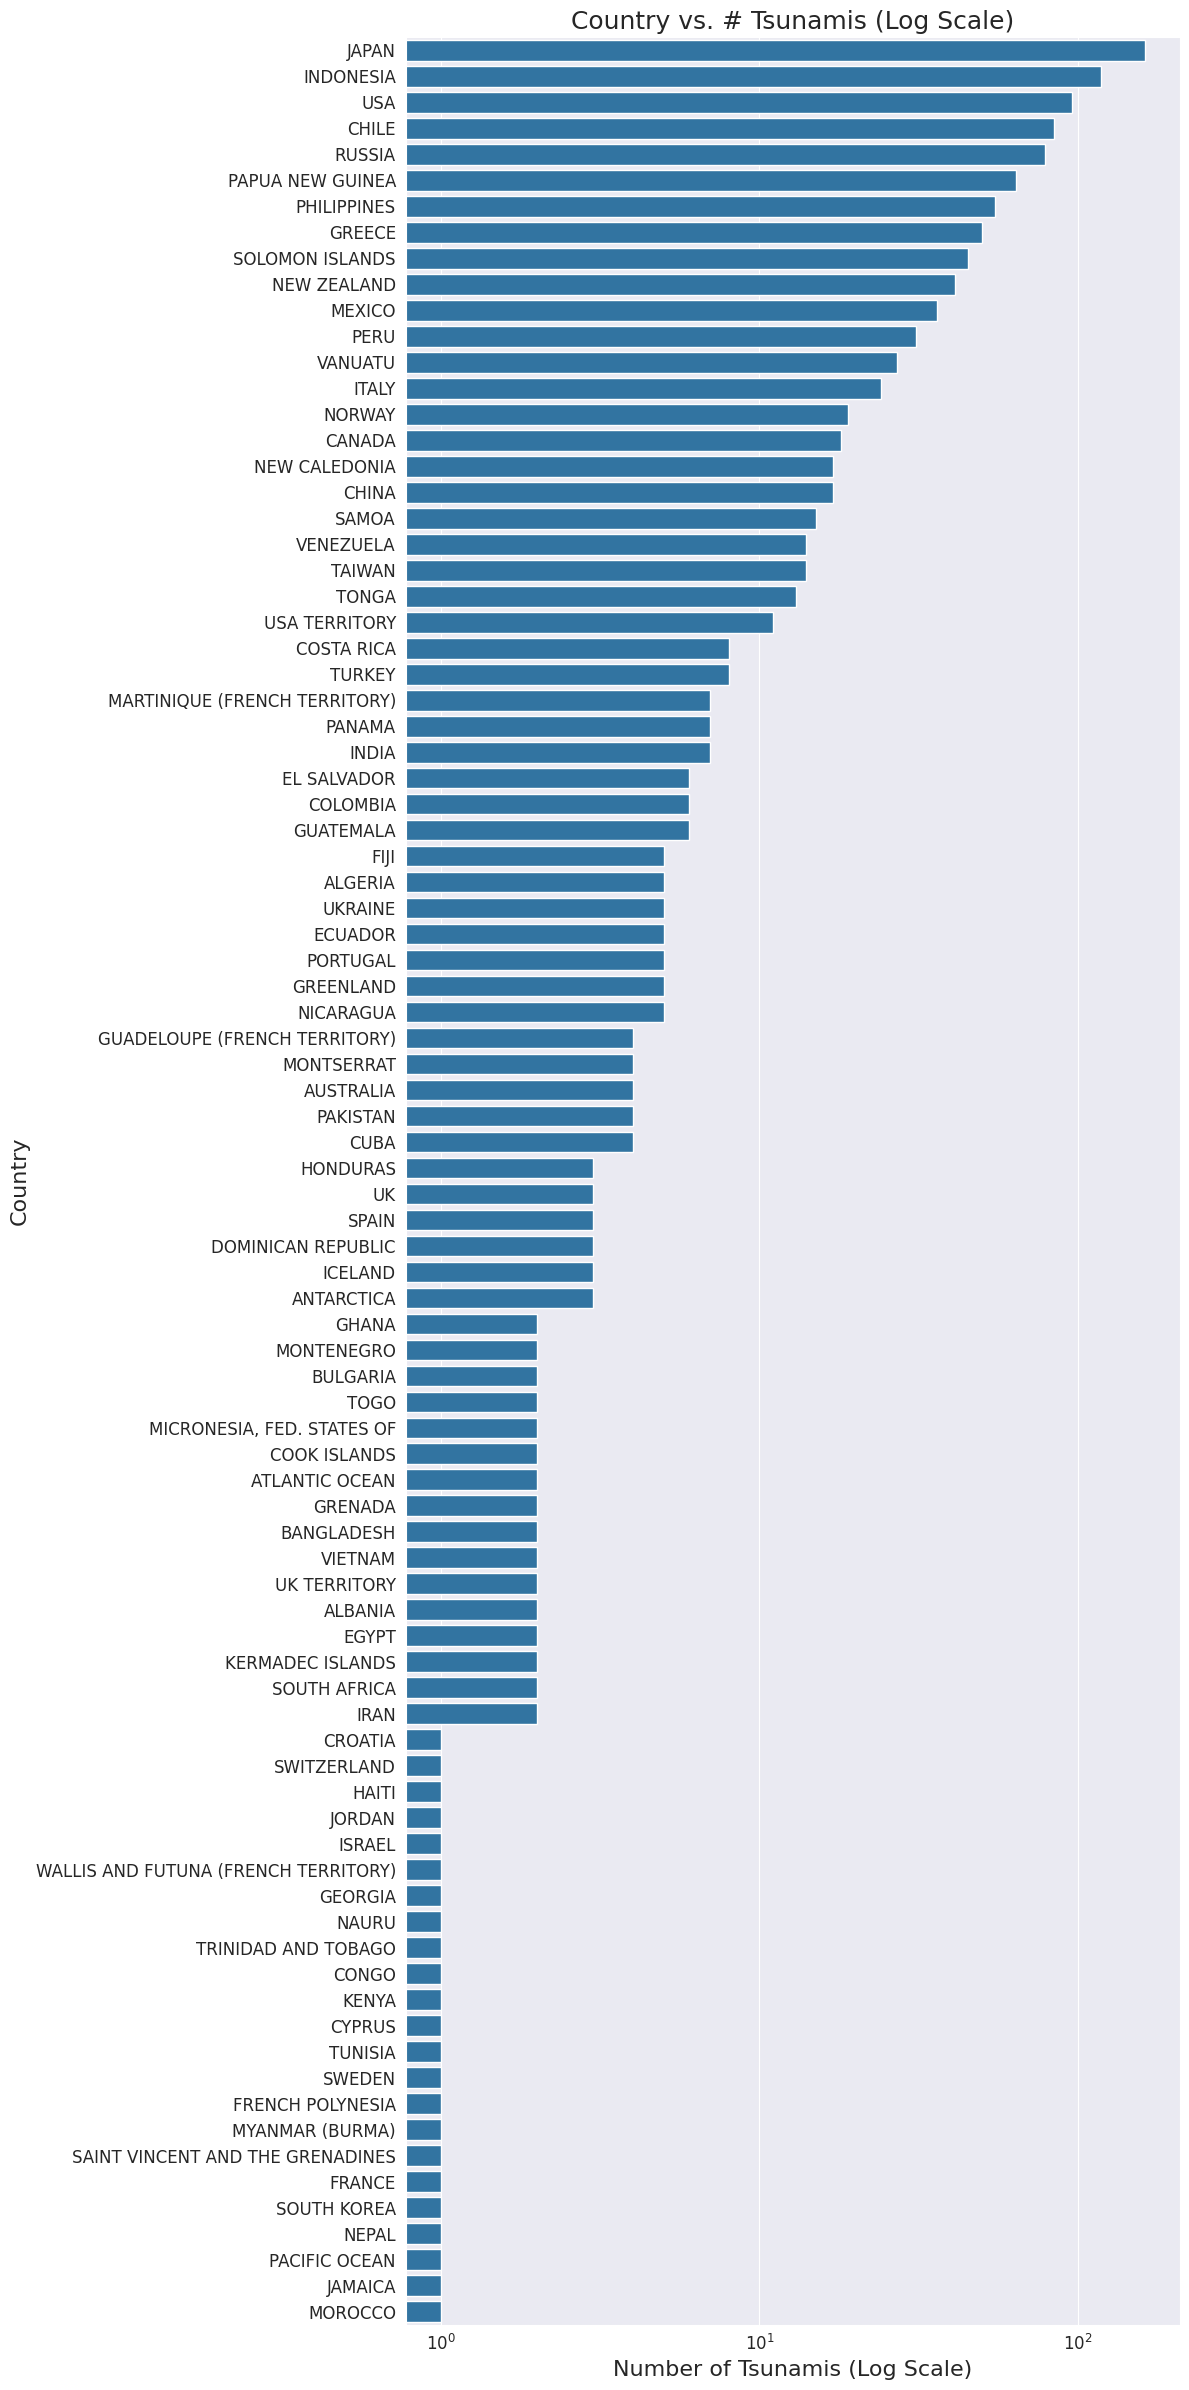

In [48]:
plt.figure(figsize=(12,24))
countries = list(map(lambda x: x.title(), df["COUNTRY"].value_counts().keys().tolist()))
ax = sns.countplot(y="COUNTRY", data=df, order=df["COUNTRY"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Country vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##### Dapat dilihat dari grafik yang ada bahwa tsunami paling banyak terjadi di Jepang yang selanjutnya disusul oleh Indonesia, lalu berikutnya USA, lalu berikutnya ada Chile. Pada grafik ini memperjelas peta penggolongan sebelumnya, dimana memang persebaran Tsunami banyak terjadi di Asia dan Amerika. 

#### <b>2. Jumlah Tsunami dan Penyebab Terjadinya

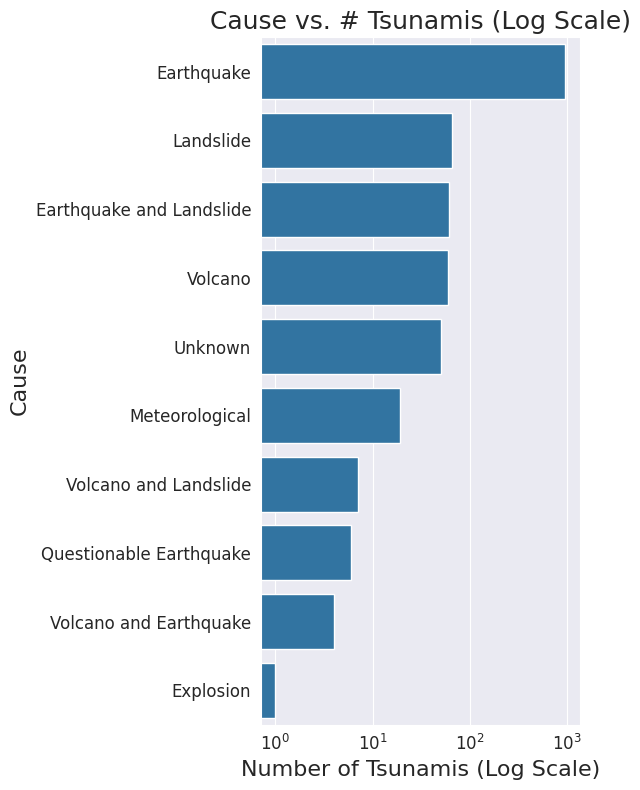

In [49]:
plt.figure(figsize=(6,8))
cause = list(map(lambda x: x.title(), df["CAUSE"].value_counts().keys().tolist()))
ax = sns.countplot(y="CAUSE", data=df, order=df["CAUSE"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Cause vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Cause",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##### Dilihat dari grafik yang tersedia kebanyakan tsunami terjadi karena adanya gempa bumi dan penyebab berikutnya tidak diketahui dengan pasti apa penyebab tsunami tersebut karena memang radar tidak mendeteksi adanya gempa bumi, gunung meletus, atau ledakan. Berikutnya disebabkan oleh gunung meletus. 

#### <b> 3. Jumlah Tsunami dan Bulan terjadinya 

<ipython-input-50-d8c80ba8626e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(months, rotation=0, fontsize=12)


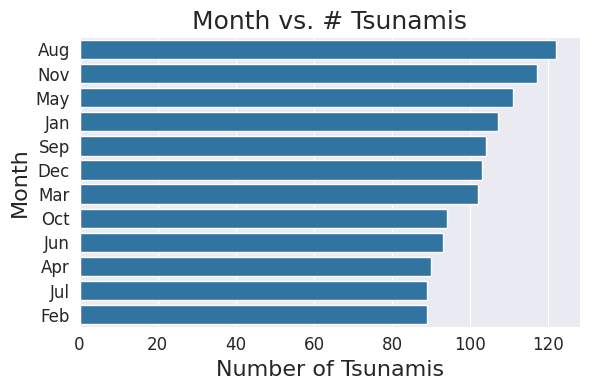

In [50]:
plt.figure(figsize=(6,4))
month_idxs = np.array(list(map(lambda x: int(x), df["MONTH"].value_counts().keys().tolist())))-1
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
months = list(map(month_names.__getitem__, month_idxs))
ax = sns.countplot(y="MONTH", data=df, order=df["MONTH"].value_counts().index)
ax.axes.set_title("Month vs. # Tsunamis",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Month",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(months, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

##### Dilihat dari grafik yang ditampilkan dapat dilihat bahwa tsunami sering terjadi di bulan agustus disusul bulan november, lalu bulan may, lalu bulan januari dan bulan yang paling sedikit terjadi tsunami adalah di bulan april  

#### <b> 4. Kerugian yang ditimbulkan oleh Tsunami

##### 4.1 Kerugian Total dilihat dari kerugian dengan capaian uang mulai kurang dari satu juta dollar hingga 25 juta dollar

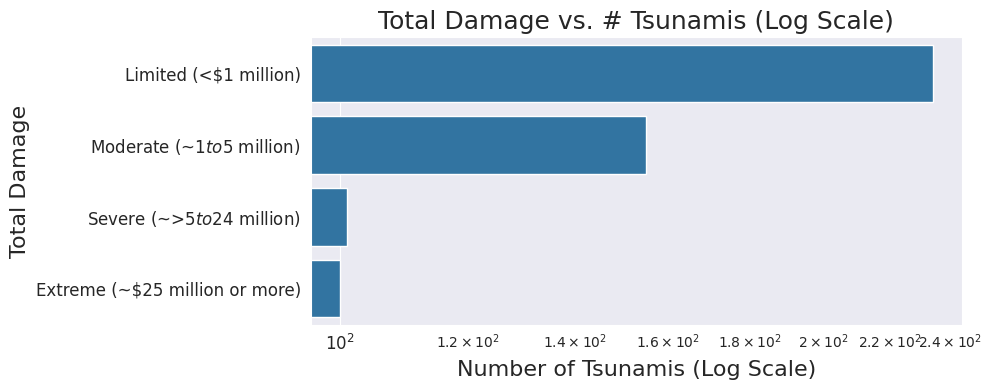

In [51]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DAMAGE_TOTAL_DESCRIPTION", data=df, order=df["DAMAGE_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Total Damage vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Total Damage",fontsize=16)
ax.tick_params(labelsize=12)
# ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

##### Bila kita lihat pada grafik maka kebanyakan tsunami tidak menyebabkan kerugian yang sangat besar dan kebanyakan kerugiannya masih dibawah satu juta dollar atau sekitar kurang dari 15 miliar rupiah. Namun ada cukup banyak juga yang kerugiannya sekisar 1 juta dollar hingga 5 juta dollar atau sekitar 15 hingga 75 miliar rupiah. Dan bahkan ada beberapa tsunami yang menyebabkan kerugian hingga lebih dari 25 juta dollar atau sekitar lebih dari 375 miliar rupiah.  

##### 4.2 Kerugian Total dilihat dari jumlah rumah yang terkena Tsunami

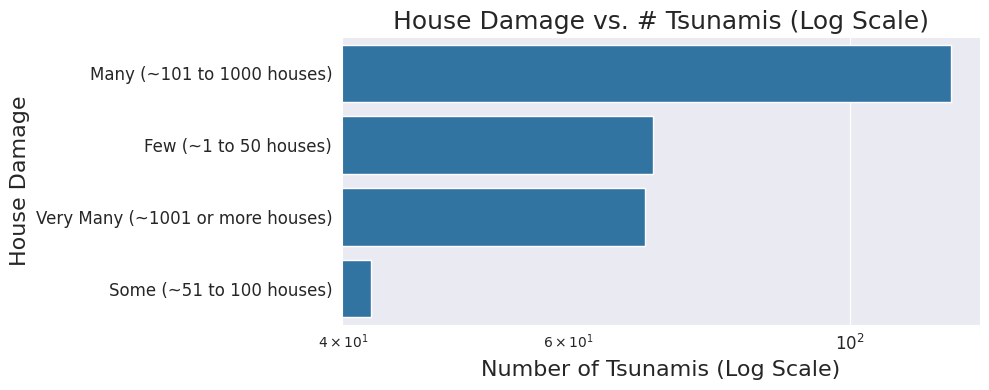

In [52]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="HOUSES_TOTAL_DESCRIPTION", data=df, order=df["HOUSES_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("House Damage vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("House Damage",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##### Bila kita lihat dari grafik maka kerukan yang diakibatkan tsunami kebanyakan akan menghancurkan lebih dari 100 rumah warga dan susul dengan menghancurkan 1 sampai 50 rumah dan berikutnya menghancurkan hingga lebih dari 1000 rumah warga, sedangkan yang terakhir menghancurkan lebih dari 51 kurang dari 100 rumah. Dari sini bisa kita lihat bahwa tsunami sangatlah merusak apalagi hal-hal seperti rumah. 

##### 4.3 Kerugian total dilihat dari jummlah kematian yang diakibatkan Tsunami

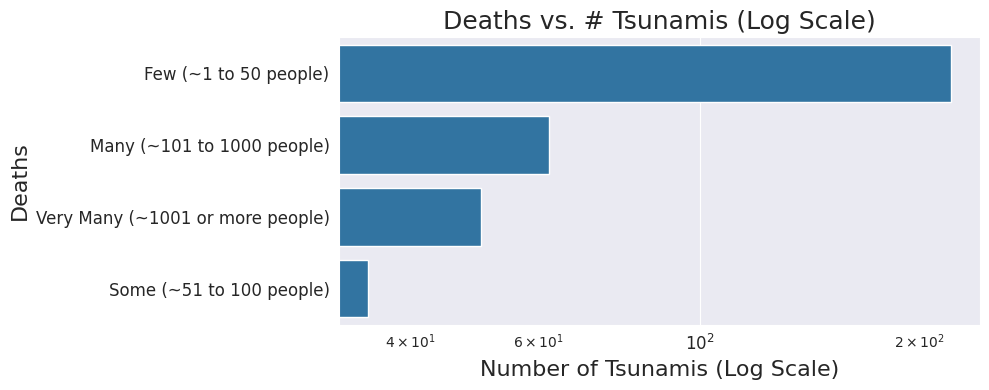

In [53]:
plt.figure(figsize=(10,4))
ax = sns.countplot(y="DEATHS_TOTAL_DESCRIPTION", data=df, order=df["DEATHS_TOTAL_DESCRIPTION"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Deaths vs. # Tsunamis (Log Scale)",fontsize=18)
ax.set_xlabel("Number of Tsunamis (Log Scale)",fontsize=16)
ax.set_ylabel("Deaths",fontsize=16)
ax.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

##### Bila kita lihat dari grafik maka kebanyakan tsunami tidak banyak menimbulkan korban dimana kebanyakan hanya menewaskan 1-50 orang saja hal ini sangat berbanding terbalik dengan kerusakan pada rumah warga. Namun peringkat kedua menewaskan 100-1000 orang dan peringkat ketiga menewaskan lebih dari 1000 orang dan terakhir menewaskan 51-100 orang sehingga bisa kita lihat bahwa data ini mirip dengan keruskan pada rumah dimana pada peringkat ketiga menghancurkan lebih dari 1000 rumah. 

### <b> Kesimpulan
##### Berdasarkan analisis yang telah dilakukan dapat dilihat bahwa tsunami cenderung terjadi di bulan Agustus dan seringkali disebabkan oleh gempa bumi. Selain itu, kerusakan atau kerugian yang diakibatkan oleh tsunami bisa dibilang cukup besar, dimana kerugian kebanyakan bisa mencapai 15 miliar rupiah atau bahkan lebih dari 375 miliar rupiah. Ditambah lagi, kerugian finansial, kerugian terhadap, dan kerusakan rumah yang juga cukup tinggi, dimana kebanyakan tsunami telah menghancurkan lebih dari 100 rumah dan bahkan bisa hingga lebih dari 1000 rumah. Meski menelan banyak rumah, jumlah korban jiwa dari banyaknya tsunami yang telah terjadi bisa dibilang relatif sedikit, yaitu berkisar pada 1-50 orang. Namun, tidak sedikit pula tsunami yang menelan 100-1000 korban jiwa atau bahkan lebih dari 1000 korban jiwa. Berdasarkan hal tersebut, bisa disimpulkan bahwa di saat tsunami terjadi di pinggiran, dimana orang lebih sukar beraktivitas maka korban jiwa yang dihasilkan akan cenderung lebih sedikit. Namun, di saat suatu tsunami terjadi di tempat dimana banyak aktivitas dilakukan, maka korban akan naik secara eksponensial karena tsunami sangat merusak dan berbahaya.